In [1]:
from tensorflow.keras import layers 
import matplotlib.pyplot as plt
from zipfile import ZipFile
import tensorflow as tf
from PIL import Image

In [2]:
with ZipFile(r'Datasets\Img\vegetables_classification\archive (4).zip') as zf:
    zf.extractall(r'Datasets\Img\vegetables_classification')

In [3]:
Image.open(r'Datasets\Img\vegetables_classification\Vegetable Images\train\Brinjal\0029.jpg').size

(224, 224)

In [4]:
data= tf.keras.utils.image_dataset_from_directory(r'Datasets\Img\vegetables_classification\Vegetable Images\train',color_mode='rgb',image_size=(64,64),batch_size=15000)

Found 15000 files belonging to 15 classes.


In [5]:
model=tf.keras.Sequential([
    layers.Conv2D(30,3,input_shape=(64,64,3),activation='leaky_relu'),
    layers.MaxPool2D(),
    layers.Conv2D(45,3,activation='leaky_relu'),
    layers.MaxPool2D(),
    layers.Conv2D(60,3,activation='leaky_relu'),
    layers.MaxPool2D(),
    layers.Conv2D(30,3,activation='leaky_relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(30,activation='leaky_relu'),
    layers.Dense(15,activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 30)        840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 45)        12195     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 45)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 60)        24360     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 60)         0

In [7]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [8]:
for features,labels in data:
    features=tf.divide(features,255)
    labels=tf.one_hot(labels,15)
    record=model.fit(features,labels,batch_size=150,epochs=100)

Epoch 1/100
100/100 [==============================] - 54s 484ms/step - loss: 2.0707 - accuracy: 0.2819
Epoch 2/100
100/100 [==============================] - 44s 438ms/step - loss: 1.3956 - accuracy: 0.5212
Epoch 3/100
100/100 [==============================] - 43s 429ms/step - loss: 1.0414 - accuracy: 0.6506
Epoch 4/100
100/100 [==============================] - 42s 417ms/step - loss: 0.8481 - accuracy: 0.7212
Epoch 5/100
100/100 [==============================] - 41s 413ms/step - loss: 0.6980 - accuracy: 0.7715
Epoch 6/100
100/100 [==============================] - 42s 420ms/step - loss: 0.6208 - accuracy: 0.7979
Epoch 7/100
100/100 [==============================] - 41s 410ms/step - loss: 0.4991 - accuracy: 0.8440
Epoch 8/100
100/100 [==============================] - 41s 412ms/step - loss: 0.4504 - accuracy: 0.8570
Epoch 9/100
100/100 [==============================] - 41s 410ms/step - loss: 0.3863 - accuracy: 0.8812
Epoch 10/100
100/100 [==============================] - 41s 412m

In [9]:
tf.keras.models.save_model(model,r'Datasets\models\vegetablesClassification.h5')

In [11]:
model=tf.keras.models.load_model(r'Datasets\models\vegetablesClassification.h5')

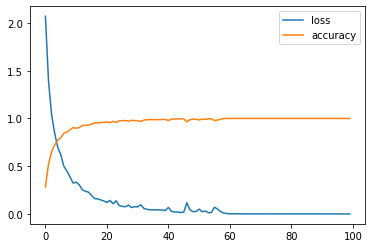

In [13]:
plt.plot(record.history['loss'],label='loss')
plt.plot(record.history['accuracy'],label='accuracy')
plt.legend()
plt.show()